In [87]:
import numpy as np

In [110]:
def susceptibility_xx(mu0_H, omega, sign, magnetisation = 0.1, gamma = 28.8, eta = 0.0001):

    omega_m = gamma * magnetisation

    omega_0 = gamma * np.sqrt(mu0_H**2 + mu0_H * magnetisation) + 1j * eta * omega

    match sign:
        case True:
            Uxx = (omega_m * omega_0) / (omega_0**2 - omega**2)
        case False:
            Uxx = (omega_m * omega_0) / (omega**2 - omega_0**2)

    return Uxx

In [105]:
field = np.linspace(-0.3, 0.3, 1000)
omega_array = np.linspace(0, 15, 1000)

fields, omegas = np.meshgrid(field, omega_array)

In [116]:

conditions_list = [fields<0, fields>=0]
choice_list = [susceptibility_xx(np.abs(fields),omegas, False), susceptibility_xx(fields,omegas, True)]

selection = np.select(conditions_list, choice_list)


/var/folders/nl/rcwwh45n7r18rywd19c710080000gp/T/ipykernel_2583/1979214412.py:5: RuntimeWarning: invalid value encountered in sqrt
  omega_0 = gamma * np.sqrt(mu0_H**2 + mu0_H * magnetisation) + 1j * eta * omega
/var/folders/nl/rcwwh45n7r18rywd19c710080000gp/T/ipykernel_2583/1979214412.py:9: RuntimeWarning: invalid value encountered in divide
  Uxx = (omega_m * omega_0) / (omega_0**2 - omega**2)


In [117]:
selection.shape

(1000, 1000)

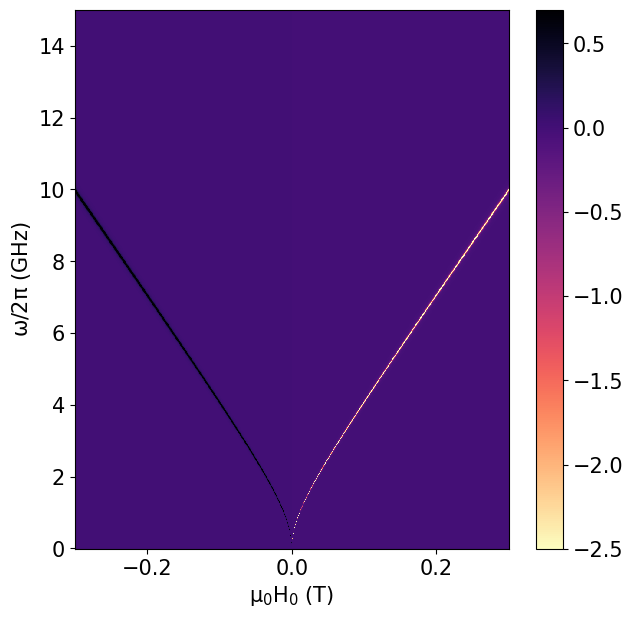

In [118]:
fig = plt.figure(figsize=(7,7))
plt.pcolormesh(field, omega_array, np.imag(selection), cmap = 'magma_r', vmin=-2.5, vmax=0.7)
plt.colorbar()
plt.rcParams['font.size'] = 15
plt.xlabel('$\mu_0H_0$ (T)')
plt.ylabel('$\omega/2\pi$ (GHz)')
plt.show()